In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from hol.count_wpm import CountWPM
from hol.anchored_count_wpm import AnchoredCountWPM

year1 = 1750
year2 = 1920

wpm0 = CountWPM(year1, year2)
wpm1 = AnchoredCountWPM(year1, year2)

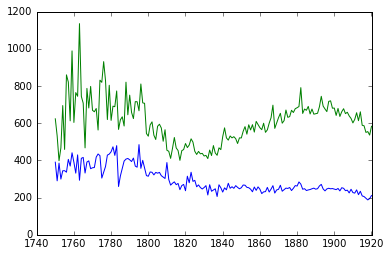

In [2]:
series = wpm0.series('art')
plt.plot(*zip(*series.items()))

series = wpm1.series('art')
plt.plot(*zip(*series.items()))

0.747576312383 7.54336371325e-32


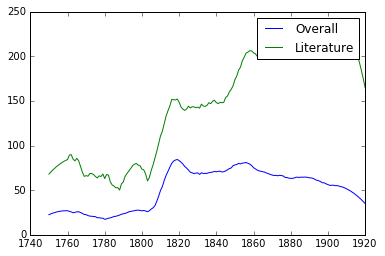

In [107]:
from collections import OrderedDict
from scipy.stats import pearsonr

def plot_token(token):

    s1 = wpm0.series_smooth(token)
    plt.plot(*zip(*s1.items()), label='Overall')

    s2 = wpm1.series_smooth(token)
    plt.plot(*zip(*s2.items()), label='Literature')
    
    plt.legend(loc='upper right')
    
    s1_resized = OrderedDict([
        (year, s1[year])
        for year in s2.keys()
    ])
    
    vals1 = list(s1_resized.values())
    vals2 = list(s2.values())
    
    corr, p = pearsonr(vals1, vals2)
    print(corr, p)
    
plot_token('bible')

In [85]:
from hol.models import AnchoredCount

mdws = AnchoredCount.mdw(year1, year2)
topn = list(mdws.keys())[:1000]

corrs = OrderedDict()
for token in topn:
    
    s1 = wpm0.series_smooth(token)
    s2 = wpm1.series_smooth(token)
    
    s1_resized = OrderedDict([
        (year, s1[year])
        for year in s2.keys()
    ])
    
    vals1 = list(s1_resized.values())
    vals2 = list(s2.values())
    
    corr, p = pearsonr(vals1, vals2)
    
    if p < 0.05:
        corrs[token] = (corr, p)

In [87]:
corrs = OrderedDict(sorted(
    corrs.items(),
    key=lambda x: x[1][0],
))

for t, (c, p) in list(corrs.items())[:1000]:
    print(t, c, p)

charm -0.705767786809 6.14738616228e-27
liable -0.704087580234 6.47943850922e-27
gross -0.59945802273 4.62001379406e-18
court -0.566878513711 6.34836834671e-16
estate -0.546032033858 1.12704320853e-14
teach -0.531367840762 7.59024994684e-14
paid -0.463757648852 1.68034064398e-10
models -0.414931295335 1.84622326962e-08
london -0.348704732392 2.95370086976e-06
judgment -0.345198328446 3.76624226288e-06
defendant -0.313028935146 5.57166969495e-05
complaint -0.30829630806 4.09056951653e-05
trial -0.249754934817 0.00098638471471
equity -0.2467838257 0.00113822282399
cos -0.227683999105 0.00413284095618
academy -0.226175106033 0.00293395627154
at -0.213088046513 0.00513784564244
under -0.207097699576 0.00657136567973
jurisdiction -0.203120711207 0.00789370583365
crown -0.182461929387 0.0169133629882
app -0.175136106045 0.0253457612957
revival -0.167006310633 0.0290189319096
suit -0.162962649058 0.0332013345375
governor 0.158583816481 0.0382961756372
england 0.161555091832 0.0347723822905
th